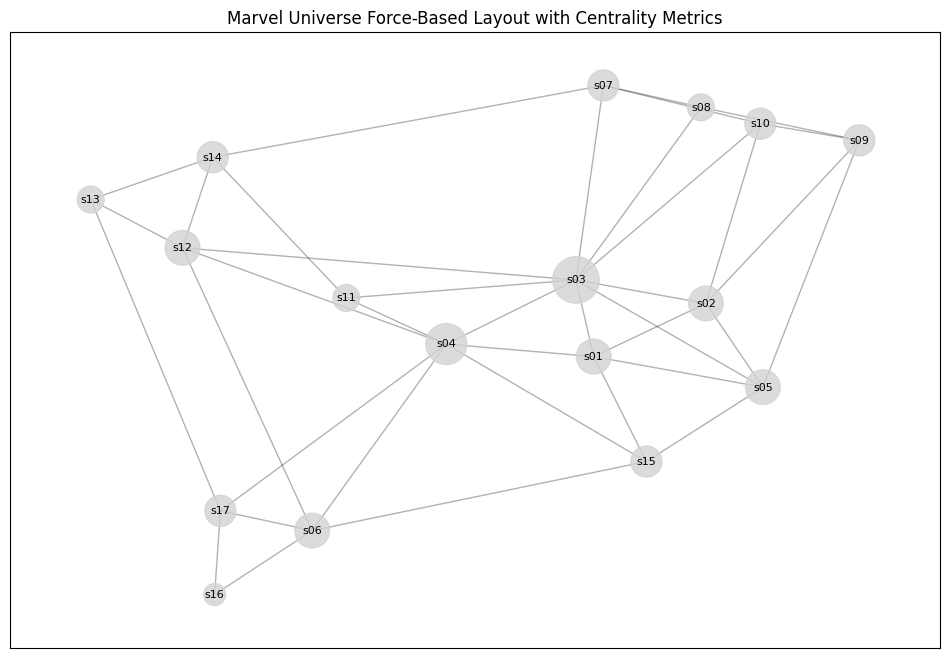

Network Density: 0.27941176470588236
Average Path Length: 2.0588235294117645

Top 5 Influential Characters by Degree Centrality:
  character  degree_centrality  betweenness_centrality  closeness_centrality
2       s03             0.5625                0.340417              0.666667
3       s04             0.4375                0.195665              0.615385
0       s01             0.3125                0.039147              0.533333
1       s02             0.3125                0.025992              0.484848
5       s05             0.3125                0.065456              0.516129


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load datasets
nodes = pd.read_csv("Nodes.csv")
edges = pd.read_csv("Edges.csv")

# Build graph
G = nx.from_pandas_edgelist(edges, 'from', 'to', ['weight', 'type'])

# Add node attributes
for i, row in nodes.iterrows():
    G.nodes[row['id']].update(row.to_dict())

# -----------------------
# 📊 METRIC ANALYSIS
# -----------------------

# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# 3. Closeness Centrality
closeness = nx.closeness_centrality(G)

# Store metrics in DataFrame
metrics_df = pd.DataFrame({
    'character': list(degree_centrality.keys()),
    'degree_centrality': list(degree_centrality.values()),
    'betweenness_centrality': list(betweenness.values()),
    'closeness_centrality': list(closeness.values())
})

# Merge with node info
final_df = pd.merge(nodes, metrics_df, left_on='id', right_on='character')


# -----------------------
# 🔮 VISUALIZATION
# -----------------------

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Node size = degree_centrality, color by alignment
nx.draw_networkx_nodes(G, pos,
                       node_size=[v * 2000 for v in degree_centrality.values()],
                       node_color=[{"Hero": "skyblue", "Villain": "lightcoral", "Neutral": "lightgrey"}.get(G.nodes[n].get("align", "Neutral")) for n in G.nodes()],
                       alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Marvel Universe Force-Based Layout with Centrality Metrics")
plt.show()

# -----------------------
# 📈 Summary Metrics
# -----------------------
print("Network Density:", density)
print("Average Path Length:", avg_path_len)
print("\nTop 5 Influential Characters by Degree Centrality:")
print(metrics_df.sort_values('degree_centrality', ascending=False).head(5))